Name: Ashwini Giri

USC ID: 5413882039

# 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

(a) Use k-means clustering on Anuran Calls (MFCCs) Data Set of Homework 4. Choose k automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots) or any other method you know.

All imports for the question

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import calinski_harabaz_score
from sklearn.metrics import hamming_loss
import warnings
warnings.filterwarnings('ignore')

Downloaded the dataset Anuran Calls. Dropping the Column RecordID as it is not included as a predictor. This dataset is a Multi-class Multi-label dataset. 

The classes are:
1. Family
2. Genus
3. Species

The labels for class 'Family' are:
1. Bufonidae
2. Dendrobatidae
3. Hylidae
4. Leptodactylidae

The Labels for class 'Genus' are:
1. Adenomera
2. Ameerega
3. Dendropsophus
4. Hypsiboas
5. Leptodactylus
6. Osteocephalus
7. Rhinella
8. Scinax

The labels for class 'Species' are:
1. AdenomeraAndre
2. AdenomeraHylaedactylus
3. Ameeregatrivittata
4. HylaMinuta
5. HypsiboasCinerascens
6. HypsiboasCordobae
7. LeptodactylusFuscus
8. OsteocephalusOophagus
9. Rhinellagranulosa
10. ScinaxRuber

In [4]:
dataframe = pd.read_csv('Frogs_MFCCs.csv')

In [9]:
diff_family = np.unique(dataframe['Family'])
diff_genus=np.unique(dataframe['Genus'])
diff_species=np.unique(dataframe['Species'])
print("FAMILY LABELS: ",diff_family)
print("GENUS LABELS: ",diff_genus)
print("SPECIES LABELS: ",diff_species)

FAMILY LABELS:  ['Bufonidae' 'Dendrobatidae' 'Hylidae' 'Leptodactylidae']
GENUS LABELS:  ['Adenomera' 'Ameerega' 'Dendropsophus' 'Hypsiboas' 'Leptodactylus'
 'Osteocephalus' 'Rhinella' 'Scinax']
SPECIES LABELS:  ['AdenomeraAndre' 'AdenomeraHylaedactylus' 'Ameeregatrivittata'
 'HylaMinuta' 'HypsiboasCinerascens' 'HypsiboasCordobae'
 'LeptodactylusFuscus' 'OsteocephalusOophagus' 'Rhinellagranulosa'
 'ScinaxRuber']


dropping column RecordID

In [10]:
dataframe = dataframe.drop(columns = ['RecordID'])
dataframe.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre


dividing the data into train data and labels

In [11]:
train = dataframe.loc[:,:'MFCCs_22']
family = dataframe['Family']
genus = dataframe['Genus']
species = dataframe['Species']

In [12]:
family.value_counts()

Leptodactylidae    4420
Hylidae            2165
Dendrobatidae       542
Bufonidae            68
Name: Family, dtype: int64

In [13]:
genus.value_counts()

Adenomera        4150
Hypsiboas        1593
Ameerega          542
Dendropsophus     310
Leptodactylus     270
Scinax            148
Osteocephalus     114
Rhinella           68
Name: Genus, dtype: int64

In [28]:
species.value_counts()

AdenomeraHylaedactylus    3478
HypsiboasCordobae         1121
AdenomeraAndre             672
Ameeregatrivittata         542
HypsiboasCinerascens       472
HylaMinuta                 310
LeptodactylusFuscus        270
ScinaxRuber                148
OsteocephalusOophagus      114
Rhinellagranulosa           68
Name: Species, dtype: int64

In [29]:
species_unique = species.unique().tolist()
family_unique = family.unique().tolist()
genus_unique = genus.unique().tolist()

In [30]:
train.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244


Using Elbow method for choosing K from range 1 to 20

In [31]:
cluster_range = range(1, 20)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(n_clusters=num_clusters)
    clusters.fit(train)
    cluster_errors.append(clusters.inertia_)

In [32]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [33]:
clusters_df[0:10]

,cluster_errors,num_clusters
0,3727.524167,1
1,2465.764126,2
2,1984.734016,3
3,1733.757406,4
4,1513.677631,5
5,1400.050684,6
6,1300.411550,7
7,1212.950696,8
8,1135.986175,9
9,1074.503085,10


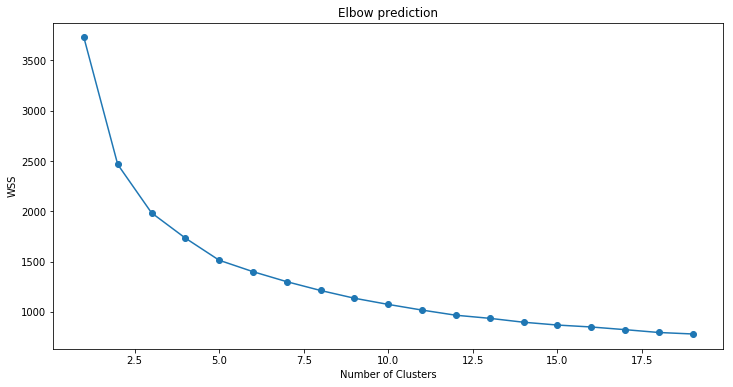

In [34]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.title('Elbow prediction')
plt.show()

here k = 5 is recognized as best using Elbow method, because there is a gradual decrease in the WSS when K=5.

CH score method for choosing K from 1 to 20

In [35]:
cluster_range = range(2, 20)
ch_score = []

for num_clusters in cluster_range:
    kmean = KMeans(n_clusters=num_clusters).fit(train)
    labels = kmean.labels_
    score = calinski_harabaz_score(train,labels)
    ch_score.append(score)

In [36]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "ch_scores": ch_score } )

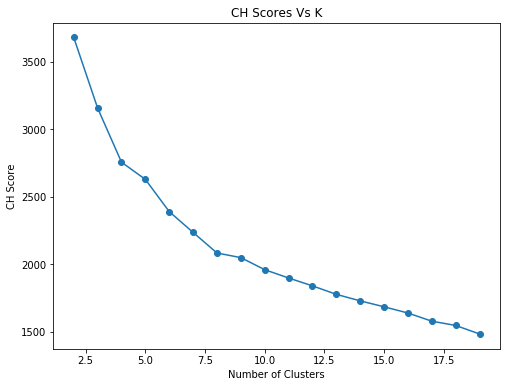

In [37]:
plt.figure(figsize=(8,6))
plt.plot( clusters_df.num_clusters, clusters_df.ch_scores, marker = "o" )
plt.xlabel('Number of Clusters')
plt.ylabel('CH Score')
plt.title('CH Scores Vs K')
plt.show()

Best K using CH score is 2 becuase the CH score is highest when the value of K is 2

Using silhouette score for choosing K from the range 1 to 20

In [38]:
cluster_range = range(2, 20)
sil_score = []

for num_clusters in cluster_range:
    kmean = KMeans(n_clusters=num_clusters).fit(train)
    labels = kmean.labels_
    score = silhouette_score(train,labels)
    sil_score.append(score)

In [39]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "sil_scores": sil_score } )

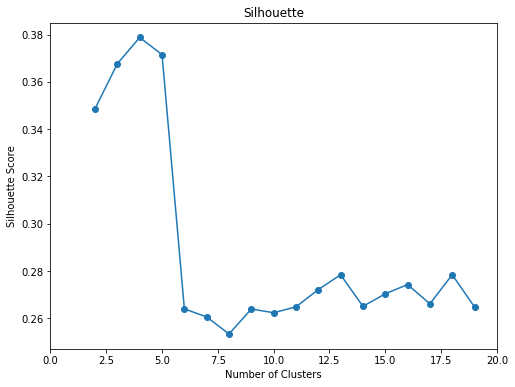

In [40]:
plt.figure(figsize=(8,6))
plt.plot( clusters_df.num_clusters, clusters_df.sil_scores, marker = "o" )
plt.xlim(0,20)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette')
plt.show()

From silhouette score the best K is 4 because after k=4 the score starts decreasing monotonuously. 
Hence for further evaluation in next questions using K=4

(b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

getting the labels assigned to the data by kmeans clustering

In [41]:
kmean = KMeans(n_clusters=4).fit(train)
labels = kmean.labels_

In [44]:
np.unique(labels)

array([0, 1, 2, 3], dtype=int32)

hence the unique labels are 0,1,2,3. Retrieving index of unique labels in below code.

In [45]:
index_0 = np.argwhere(labels == 0)
index_1 = np.argwhere(labels == 1)
index_2 = np.argwhere(labels == 2)
index_3 = np.argwhere(labels == 3)

creating dataframe for each label of each class

In [46]:
family1_truelabels = pd.DataFrame(columns=['family'])
family2_truelabels = pd.DataFrame(columns=['family'])
family3_truelabels = pd.DataFrame(columns=['family'])
family4_truelabels = pd.DataFrame(columns=['family'])

genus1_truelabels = pd.DataFrame(columns=['genus'])
genus2_truelabels = pd.DataFrame(columns=['genus'])
genus3_truelabels = pd.DataFrame(columns=['genus'])
genus4_truelabels = pd.DataFrame(columns=['genus'])

species1_truelabels = pd.DataFrame(columns=['species'])
species2_truelabels = pd.DataFrame(columns=['species'])
species3_truelabels = pd.DataFrame(columns=['species'])
species4_truelabels = pd.DataFrame(columns=['species'])

In [47]:
index_0 = index_0[:,0].tolist()
index_1 = index_1[:,0].tolist()
index_2 = index_2[:,0].tolist()
index_3 = index_3[:,0].tolist()

In [48]:
for i in index_0:
    family1_truelabels.loc[i] = family.iloc[i]
    genus1_truelabels.loc[i] = genus.iloc[i]
    species1_truelabels.loc[i] = species.iloc[i]
for i in index_1:
    family2_truelabels.loc[i] = family.iloc[i]
    genus2_truelabels.loc[i] = genus.iloc[i]
    species2_truelabels.loc[i] = species.iloc[i]
for i in index_2:
    family3_truelabels.loc[i] = family.iloc[i]
    genus3_truelabels.loc[i] = genus.iloc[i]
    species3_truelabels.loc[i] = species.iloc[i]
for i in index_3:
    family4_truelabels.loc[i] = family.iloc[i]
    genus4_truelabels.loc[i] = genus.iloc[i]
    species4_truelabels.loc[i] = species.iloc[i]

In [58]:
family1_high = (family1_truelabels['family'].value_counts()).index
family2_high = (family2_truelabels['family'].value_counts()).index
family3_high = (family3_truelabels['family'].value_counts()).index
family4_high = (family4_truelabels['family'].value_counts()).index
species1_high = (species1_truelabels['species'].value_counts()).index
species2_high = (species2_truelabels['species'].value_counts()).index
species3_high = (species3_truelabels['species'].value_counts()).index
species4_high = (species4_truelabels['species'].value_counts()).index
genus1_high = (genus1_truelabels['genus'].value_counts()).index
genus2_high = (genus2_truelabels['genus'].value_counts()).index
genus3_high = (genus3_truelabels['genus'].value_counts()).index
genus4_high = (genus4_truelabels['genus'].value_counts()).index

In [70]:
F = [family1_high[0],family2_high[0],family3_high[0],family4_high[0]]
G = [genus1_high[0],genus2_high[0],genus3_high[0],genus4_high[0]]
S = [species1_high[0],species2_high[0],species3_high[0],species4_high[0]]

In [98]:
print("Family labels assigned to clusters using majority pooling: \n")
for i in range(0,4):
    print("Cluster "+str(i+1)+":\t"+str(F[i]))
    
print("\n\nGenus labels assigned to clusters: \n")
for i in range(0,4):
    print("Cluster "+str(i+1)+":\t"+str(G[i]))
    
print("\n\nSpecies labels assigned to clusters: \n")
for i in range(0,4):
    print("Cluster "+str(i+1)+":\t"+str(S[i]))

Family labels assigned to clusters using majority pooling: 

Cluster 1:	Leptodactylidae
Cluster 2:	Dendrobatidae
Cluster 3:	Hylidae
Cluster 4:	Hylidae


Genus labels assigned to clusters: 

Cluster 1:	Adenomera
Cluster 2:	Ameerega
Cluster 3:	Hypsiboas
Cluster 4:	Hypsiboas


Species labels assigned to clusters: 

Cluster 1:	AdenomeraHylaedactylus
Cluster 2:	Ameeregatrivittata
Cluster 3:	HypsiboasCordobae
Cluster 4:	HypsiboasCinerascens


In [83]:
display_data = pd.DataFrame(columns=['Labels','Cluster1','Cluster2','Cluster3','Cluster4'])
display_data.loc[0] = ['Family']+F
display_data.loc[1] = ['Species']+S
display_data.loc[2] = ['Genus']+G

print("\tLabel triplets assigned to clusters using majority pooling")
display_data

	Label triplets assigned to clusters using majority pooling


,Labels,Cluster1,Cluster2,Cluster3,Cluster4
0,Family,Leptodactylidae,Dendrobatidae,Hylidae,Hylidae
1,Species,AdenomeraHylaedactylus,Ameeregatrivittata,HypsiboasCordobae,HypsiboasCinerascens
2,Genus,Adenomera,Ameerega,Hypsiboas,Hypsiboas


(c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance between the true labels and the labels assigned by clusters.

Assigning the value of label calculated using majority pooling to every data point of the respective cluster. Then calculating the distance between the labels assigned by the kmeans algorithm and the true labels. 

In [86]:
predict = kmean.predict(train)
family_predict=predict
genus_predict=predict
species_predict=predict

In [87]:
family_df = pd.DataFrame(family_predict,columns=['Family'])
genus_df = pd.DataFrame(genus_predict,columns=['Genus'])
species_df = pd.DataFrame(species_predict,columns=['Species'])

In [93]:
family_df = family_df.replace([0,1,2,3],F)
genus_df = genus_df.replace([0,1,2,3],G)
species_df = species_df.replace([0,1,2,3],S)

In [96]:
hammingscore_family = hamming_loss(dataframe['Family'],family_df)
hammingscore_genus = hamming_loss(dataframe['Genus'],genus_df)
hammingscore_species = hamming_loss(dataframe['Species'],species_df)

In [97]:
print("The Hamming Distance for label Family is: "+str(hammingscore_family))
print("The Hamming Distance for label Genus is: "+str(hammingscore_genus))
print("The Hamming Distance for label Speies is: "+str(hammingscore_species))

The Hamming Distance for label Family is: 0.19360667129951356
The Hamming Distance for label Genus is: 0.22918693537178597
The Hamming Distance for label Speies is: 0.2444753300903405
